there is another dataset
I think the dataset you worked on is all about the ship
not necessary. I think it is easy to find the coordinates of gas station. So I think this dataset has ship location. We can assume a ship around the gas station is to try to fill the gas. Then track the ship. And based on the ship size, we can calculate how much the oil left in its tank
And of course, we might need some expert knowledge of the MPG of a ship of certain size
the dataset I gave you is one day's data. We might need to rollup multiple days

Updates
Client is focused
* on fueling of fishing ships only
  * filter out other types

Calculating gas left in tank
* total volume of tank = t
* distance time fuel consumption

When ship enters a port
* Ship will fill gas tank?
  * not necessarily true
* if ship goes to a port went to second port in rapid succession.

Distance
Ship activity during the day
* time
* groundSpeed
* lat long?
* fuel consumption?

In [72]:
import pandas as pd
import numpy as np
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib notebook

ImportError: No module named 'mpl_toolkits.basemap'

In [2]:
pathData = '''D:\\data\\ships\\'''
shipFileName = '''st.txt'''
sailingFileName ='''dy.txt'''

schemaDynamic = ['timestampUNIX',
    'MMSI', # (Maritime Mobile Service Identity)
    'navCondition',
    'steeringRate',
    'speedOverGround',
    'deviceAccuracy',
    'latitude',
    'longitude',
    'gpsCOG', # Course over ground
    'heading',
    'utcVerificationSeconds',
    'packetID',
    'dataSourceID']
schemaStatic = ['timestampUNIX',
    'MMSI', # (Maritime Mobile Service Identity)
    'IMO', # (International Maritime Organization)
    'callsign',
    'vessel',
    'shipType',
    'captain',
    'breadth',
    'pointingDeviceType',
    'eta',
    'currentDraft',
    'destination',
    'packetID',
    'dataSourceID']

In [3]:
#shipData = pd.read_csv(pathData, header=None, engine='c', skiprows=[83988, 137058, 288322])
shipData = pd.read_csv(pathData+shipFileName, header=None, engine='c', quoting=3, error_bad_lines=False)
sailingData = pd.read_csv(pathData+sailingFileName, header=None, engine='c', quoting=3, error_bad_lines=False)

In [4]:
shipData.columns = schemaStatic
sailingData.columns = schemaDynamic

In [5]:
shipData.head()

,timestampUNIX,MMSI,IMO,callsign,vessel,shipType,captain,breadth,pointingDeviceType,eta,currentDraft,destination,packetID,dataSourceID
0,1409501013,219905000,0,XP5174,L68 JANGA BORK,30,18,6,1,1596,30,CH 16 FOR DEST,5,103
1,1409501013,219946000,0,OZYD,HELLE JES,30,21,6,1,1596,0,HUIDB SANDE,5,103
2,1409501013,261182647,0,SR2647,KRYSTYNA,99,62,8,15,568448,2,KALININGRAD *:,5,103
3,1409501013,265623790,0,NaN,EMM XXIII,0,0,0,0,0,0,NaN,24,103
4,1409501013,305477000,9160334,V2EM4,VECHTBORG,70,133,16,1,582656,48,BREMEN BY KIEL CANAL,5,103


In [6]:
sailingData.head()

,timestampUNIX,MMSI,navCondition,steeringRate,speedOverGround,deviceAccuracy,latitude,longitude,gpsCOG,heading,utcVerificationSeconds,packetID,dataSourceID
0,1409501013,205218000,5,0,0,1,-0.071837,53.579707,1482,208,45,3,103
1,1409501013,211596150,0,0,0,1,12.098808,54.181470,3600,511,47,18,103
2,1409501013,231742000,0,0,72,1,-6.759133,62.081663,1401,511,32,18,103
3,1409501013,232000760,0,129,129,0,-2.710517,59.292250,2335,231,47,1,103
4,1409501013,235031438,0,0,0,0,11.849462,57.670968,2716,511,47,18,103


# Join ship data to sailing Data by MMSI

Note there was a memory error when joining entire day of sailingData

Therefore:
* These data sets need to be in a DB
* For now test algorithms on a single MMSI

In [24]:
# Use only a few rows due to memory issues
sampleSize = 100000

# Sample of 5 MMSI's and a single MMSI
exampleMMSIList = sailingData.MMSI.unique()[0:4]
exampleMMSI = exampleMMSIList[0]

In [ ]:
pd.DataFrame.drop_duplicates

In [53]:
shipData.loc[shipData.MMSI == exampleMMSI, ['MMSI', 'IMO', 'callsign', 'vessel', 'shipType', 
                                          'captain', 'breadth', 
                                          'eta', 'currentDraft', 'destination']].drop_duplicates()

,MMSI,IMO,callsign,vessel,shipType,captain,breadth,eta,currentDraft,destination
117369,205218000,8222563,ORGQ,BNS BELGICA,1,51,10,1596,0,NaN
1134972,205218000,8222563,ORGQ,BNS BELGICA,1,51,10,0,0,NaN


In [55]:
exampleFilter = sailingData.MMSI.apply(lambda x: x in exampleMMSIList)
sailingShipData = pd.merge(left=sailingData.loc[exampleFilter, :], 
                           right=shipData.loc[:, ['timestampUNIX','MMSI', 'IMO', 'callsign', 'vessel', 'shipType', 
                                          'captain', 'breadth', 
                                          'eta', 'currentDraft', 'destination']].drop_duplicates(), 
                           how='left', 
                           on=['timestampUNIX', 'MMSI'])

In [56]:
sailingShipData.columns

Index(['timestampUNIX', 'MMSI', 'navCondition', 'steeringRate',
       'speedOverGround', 'deviceAccuracy', 'latitude', 'longitude', 'gpsCOG',
       'heading', 'utcVerificationSeconds', 'packetID', 'dataSourceID', 'IMO',
       'callsign', 'vessel', 'shipType', 'captain', 'breadth', 'eta',
       'currentDraft', 'destination'],
      dtype='object')

In [57]:
sailingShipData.head()

,timestampUNIX,MMSI,navCondition,steeringRate,speedOverGround,deviceAccuracy,latitude,longitude,gpsCOG,heading,...,dataSourceID,IMO,callsign,vessel,shipType,captain,breadth,eta,currentDraft,destination
0,1409501013,205218000,5,0,0,1,-0.071837,53.579707,1482,208,...,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1409501013,211596150,0,0,0,1,12.098808,54.181470,3600,511,...,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1409501013,231742000,0,0,72,1,-6.759133,62.081663,1401,511,...,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1409501013,232000760,0,129,129,0,-2.710517,59.292250,2335,231,...,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1409501122,232000760,0,0,129,0,-2.721533,59.287867,2333,230,...,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sample down to a single ship

In [58]:
print('Number of rows in sailingData %i' % sailingData.shape[0])
print('Number of rows in sampled sailingData joined to shipData %i' % sailingShipData.shape[0])

Number of rows in sailingData 18484008
Number of rows in sampled sailingData joined to shipData 1012


In [59]:
print('Number of ships in sample = %i' % len(sailingShipData.MMSI.unique()))
print('Example of distance is calculated on MMSI = %i' % exampleMMSI)

Number of ships in sample = 4
Example of distance is calculated on MMSI = 205218000


Each ship actually has multiple entries in the static Data set too, representing the ship's changing state over the course of the journey. Joing sailing data to ship data needs to be done on both MMSI and timestamp, where MMSI 

In [60]:
print('Number of data points in unsampled sailingData for sample MMSI = %i' % sailingData[sailingData.MMSI == 205218000].shape[0])
print('Number of data points in unsampled shipData for sample MMSI = %i' % shipData[shipData.MMSI == 205218000].shape[0])
print('Number of data points in sampled sailingShipData for sample MMSI = %i' % sailingShipData[sailingShipData.MMSI == 205218000].shape[0])

Number of data points in unsampled sailingData for sample MMSI = 341
Number of data points in unsampled shipData for sample MMSI = 38
Number of data points in sampled sailingShipData for sample MMSI = 341


# Calculate distance traveled by ship

Calculating distance between two location (lat, long) tuples requires accounting for curvature in the earth's surface:
* http://www.movable-type.co.uk/scripts/latlong.html
* https://en.wikipedia.org/wiki/Spherical_law_of_cosines

Given two points (A_Lat, A_Long), (B_Lat, B_Long) the distance:
* $C = sin(A_{Lat})*sin(B_{Lat}) + cos(A_{Lat})*cos(B_{Lat})*cos(A_Long-B_{Long})$
* $Distance = R*Arccos(C)*\pi/180$
  * Where, R is the average earth radius, which is 6371.004 km. 

I will need a new dataset that has ship to distance travelled, which should be derived from the sailing dataset.

In [64]:
# Very few of the timestamps line up between the sailing and ship data sets, but surprisingly some do
sailingShipData[(sailingShipData.MMSI == 205218000) & (sailingShipData.currentDraft.isnull() == False)]

,timestampUNIX,MMSI,navCondition,steeringRate,speedOverGround,deviceAccuracy,latitude,longitude,gpsCOG,heading,...,dataSourceID,IMO,callsign,vessel,shipType,captain,breadth,eta,currentDraft,destination
352,1409527534,205218000,5,0,0,0,-0.071813,53.579703,1482,208,...,38,8222563,ORGQ,BNS BELGICA,1,51,10,0,0,NaN
426,1409548254,205218000,5,0,0,1,-0.071848,53.579712,1482,208,...,101,8222563,ORGQ,BNS BELGICA,1,51,10,1596,0,NaN
725,1409570271,205218000,0,129,29,0,0.647547,53.444705,792,41,...,38,8222563,ORGQ,BNS BELGICA,1,51,10,0,0,NaN


In [71]:
sailingShipData.loc[:, 'datestring'] = pd.to_datetime(sailingShipData.timestampUNIX, unit='s')
print(sailingShipData.datestring.min(), sailingShipData.datestring.max())

2014-08-31 16:03:33 2014-09-01 16:06:49


In [74]:
oneShip = sailingShipData.loc[(sailingShipData.MMSI == 205218000)]

In [76]:
oneShip

,timestampUNIX,MMSI,navCondition,steeringRate,speedOverGround,deviceAccuracy,latitude,longitude,gpsCOG,heading,...,IMO,callsign,vessel,shipType,captain,breadth,eta,currentDraft,destination,datestring
0,1409501013,205218000,5,0,0,1,-0.071837,53.579707,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:03:33
6,1409501180,205218000,5,0,0,1,-0.071832,53.579700,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:06:20
11,1409501360,205218000,5,0,0,1,-0.071833,53.579705,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:09:20
14,1409501541,205218000,5,0,0,1,-0.071827,53.579693,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:12:21
18,1409501721,205218000,5,0,0,1,-0.071827,53.579700,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:15:21
29,1409502081,205218000,5,0,0,1,-0.071845,53.579703,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:21:21
34,1409502261,205218000,5,0,0,1,-0.071830,53.579700,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:24:21
49,1409502802,205218000,5,0,0,1,-0.071833,53.579707,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:33:22
52,1409502978,205218000,5,0,0,0,-0.071833,53.579705,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:36:18
53,1409502981,205218000,5,0,0,1,-0.071832,53.579707,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:36:21


In [75]:
oneShip.sort(columns='timestampUNIX')

,timestampUNIX,MMSI,navCondition,steeringRate,speedOverGround,deviceAccuracy,latitude,longitude,gpsCOG,heading,...,IMO,callsign,vessel,shipType,captain,breadth,eta,currentDraft,destination,datestring
0,1409501013,205218000,5,0,0,1,-0.071837,53.579707,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:03:33
6,1409501180,205218000,5,0,0,1,-0.071832,53.579700,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:06:20
11,1409501360,205218000,5,0,0,1,-0.071833,53.579705,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:09:20
14,1409501541,205218000,5,0,0,1,-0.071827,53.579693,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:12:21
18,1409501721,205218000,5,0,0,1,-0.071827,53.579700,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:15:21
29,1409502081,205218000,5,0,0,1,-0.071845,53.579703,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:21:21
34,1409502261,205218000,5,0,0,1,-0.071830,53.579700,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:24:21
49,1409502802,205218000,5,0,0,1,-0.071833,53.579707,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:33:22
52,1409502978,205218000,5,0,0,0,-0.071833,53.579705,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:36:18
53,1409502981,205218000,5,0,0,1,-0.071832,53.579707,1482,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-31 16:36:21


<IPython.core.display.Javascript object>


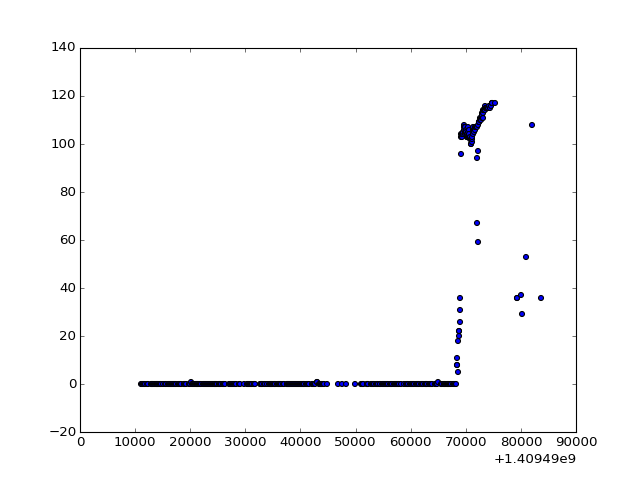

In [81]:
fig, ax = plt.subplots()
#ax.scatter(pd.to_datetime(oneShip.datestring), oneShip.speedOverGround)
ax.scatter(oneShip.timestampUNIX, oneShip.speedOverGround)

In [82]:
oneShip.latitude.cumsum()

0      -0.071837
6      -0.143669
11     -0.215502
14     -0.287329
18     -0.359156
29     -0.431001
34     -0.502831
49     -0.574664
52     -0.646497
53     -0.718329
57     -0.790159
62     -0.862004
65     -0.933852
68     -1.005665
71     -1.077502
77     -1.149325
78     -1.221170
80     -1.293015
85     -1.364860
88     -1.436697
96     -1.508545
104    -1.580375
108    -1.652215
116    -1.724052
120    -1.795880
124    -1.867708
128    -1.939533
131    -2.011350
135    -2.083185
139    -2.155013
         ...    
637   -13.550074
640   -13.318781
642   -13.082321
645   -12.839821
647   -12.591094
651   -12.335324
653   -12.073479
655   -11.805341
658   -11.531894
660   -11.253121
662   -10.969019
664   -10.679579
666   -10.383917
668   -10.082922
671    -9.774022
676    -9.444822
678    -9.099540
679    -8.747935
681    -8.376720
682    -7.969335
683    -7.556903
684    -7.138670
687    -6.705017
704    -6.040997
705    -5.376977
720    -4.705280
725    -4.057733
741    -3.3736

# Plot points on a map

In [81]:
#eta is in days?
851436 / 60/ 60 / 24

9.854583333333334

In [82]:
# currentDraft is an 8 bit number?
np.log2(256)

8.0

In [60]:
sum(shipData.iloc[:, 0].isnull())

0

In [45]:
shipData.shape

(3267075, 14)

In [41]:
shipData.loc[83987]

0               1409503140
1                538004244
2                  9218404
3                  V7VZ2  
4     FEDERAL SHIMANTO    
5                       70
6                      190
7                       23
8                        1
9                   592768
10                      60
11                MONTREAL
12                       5
13                     101
Name: 83987, dtype: object

In [42]:
temp[0:4]

['1409501013,219905000,0,XP5174 ,L68 JANGA BORK      ,30,18,6,1,1596,30,CH 16 FOR DEST      ,5,103\n',
 '1409501013,219946000,0,OZYD   ,HELLE JES           ,30,21,6,1,1596,0,HUIDB SANDE         ,5,103\n',
 '1409501013,261182647,0,SR2647,KRYSTYNA ,99,62,8,15,568448,2,KALININGRAD *:,5,103\n',
 '1409501013,265623790,0,,EMM XXIII,0,0,0,0,0,0,,24,103\n']

In [52]:
len(schemaDynamic)

13

In [53]:
temp = shipData.head()
temp.columns = schemaStatic
temp

,UNIX timestamp,Ship MMSI,IMO Ship (International Maritime Organization),Ship callsign,Vessel,The type of ship,captain,Breadth,Pointing device type,ETA,The current draft,destination,Packet ID,Data Source ID
0,1409501013,219905000,0,XP5174,L68 JANGA BORK,30,18,6,1,1596,30,CH 16 FOR DEST,5,103
1,1409501013,219946000,0,OZYD,HELLE JES,30,21,6,1,1596,0,HUIDB SANDE,5,103
2,1409501013,261182647,0,SR2647,KRYSTYNA,99,62,8,15,568448,2,KALININGRAD *:,5,103
3,1409501013,265623790,0,NaN,EMM XXIII,0,0,0,0,0,0,NaN,24,103
4,1409501013,305477000,9160334,V2EM4,VECHTBORG,70,133,16,1,582656,48,BREMEN BY KIEL CANAL,5,103


In [38]:
shipData.head().describe()

,0,1,2,5,6,7,8,9,10,12,13
count,5.000000e+00,5.000000e+00,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5
mean,1.409501e+09,2.544269e+08,1832066.800000,45.800000,46.80000,7.200000,3.600000,230859.200000,16.000000,8.800000,103
std,2.262742e+01,3.590897e+07,4096625.904121,38.771123,53.26068,5.761944,6.387488,314700.804872,21.954498,8.497058,0
min,1.409501e+09,2.199050e+08,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,103
25%,1.409501e+09,2.199460e+08,0.000000,30.000000,18.00000,6.000000,1.000000,1596.000000,0.000000,5.000000,103
50%,1.409501e+09,2.611826e+08,0.000000,30.000000,21.00000,6.000000,1.000000,1596.000000,2.000000,5.000000,103
75%,1.409501e+09,2.656238e+08,0.000000,70.000000,62.00000,8.000000,1.000000,568448.000000,30.000000,5.000000,103
max,1.409501e+09,3.054770e+08,9160334.000000,99.000000,133.00000,16.000000,15.000000,582656.000000,48.000000,24.000000,103


In [43]:
temp[-5:]

['1409588028,910060265,0,,                    ,0,0,0,0,0,0,,24,14\n',
 '1409588044,200000054,0,,YU FA 3 HAO A JING  ,30,26,4,0,0,0,,19,14\n',
 '1409588067,200006446,0,,                    ,0,0,0,0,0,0,,24,14\n',
 '1409588086,412467672,0,,YUE DIANYU41178     ,0,0,0,0,0,0,,24,14\n',
 '1409588088,910060265,0,       ,,30,0,0,0,0,0,,24,14\n']

In [37]:
shipData.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
3267070,1409588028,910060265,0,NaN,,0,0,0,0,0,0,NaN,24,14
3267071,1409588044,200000054,0,NaN,YU FA 3 HAO A JING,30,26,4,0,0,0,NaN,19,14
3267072,1409588067,200006446,0,NaN,,0,0,0,0,0,0,NaN,24,14
3267073,1409588086,412467672,0,NaN,YUE DIANYU41178,0,0,0,0,0,0,NaN,24,14
3267074,1409588088,910060265,0,,NaN,30,0,0,0,0,0,NaN,24,14
